# Patient Clustering - Assignment 1 - Computational Intelligence (Q)

* NRP: 6025232026
* Name: Katherine Oktaviani Yap Rui Qi

Goal: cluster and identify patient's condition to apply appropriate treatment

In [3]:
# all import functions
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy import stats
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# Data Cleaning

In [5]:
df = pd.read_csv("../patient_dataset.csv")
df

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,residence_type,smoking_status
0,24,1.0,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,Urban,Smoker
1,29,0.0,4,132,187,147,0,202.0,42.0,NaN,25.588346,0.283986,1,1,Urban,Unknown
2,46,0.0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,Rural,Non-Smoker
3,73,NaN,2,102,200,125,0,105.0,77.0,165.0,18.660241,1.472052,0,1,Rural,Smoker
4,49,1.0,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,Rural,Smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,76,1.0,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,Rural,Non-Smoker
5996,51,1.0,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,Urban,Non-Smoker
5997,70,0.0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,Urban,Non-Smoker
5998,78,0.0,2,131,189,133,1,196.0,83.0,150.0,24.987071,0.719095,1,0,Urban,Non-Smoker


In [6]:
df.isnull().sum()
df.dtypes

age                    int64
gender               float64
chest_pain_type        int64
blood_pressure         int64
cholesterol            int64
max_heart_rate         int64
exercise_angina        int64
plasma_glucose       float64
skin_thickness       float64
insulin              float64
bmi                  float64
diabetes_pedigree    float64
hypertension           int64
heart_disease          int64
residence_type        object
smoking_status        object
dtype: object

In [7]:
df_cleaning = df.copy()

In [8]:
df_cleaning = df_cleaning.dropna()

In [9]:
df_cleaning.isnull().sum()

age                  0
gender               0
chest_pain_type      0
blood_pressure       0
cholesterol          0
max_heart_rate       0
exercise_angina      0
plasma_glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
residence_type       0
smoking_status       0
dtype: int64

In [10]:
mk = LabelEncoder()
df_cleaning['residence_type'] = mk.fit_transform(df_cleaning['residence_type'])
df_cleaning['smoking_status'] = mk.fit_transform(df_cleaning['smoking_status'])

In [11]:
#check for correlation of residence type to other attributes
attributes = list(df_cleaning.columns.values)

for i in attributes:
    crosstab = pd.crosstab(df_cleaning['residence_type'], df_cleaning[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    #result = pd.DataFrame({"attribute": i, "chi2": chi2, "pvalue" : p, "dof" : dof})
    #chi_square_result.append(result)
    print(f"Chi2 result of the contingency table for attribute {i}: {chi2}, p-value: {p}, dof: {dof}")

Chi2 result of the contingency table for attribute age: 73.26258167057728, p-value: 0.43639403678548244, dof: 72
Chi2 result of the contingency table for attribute gender: 0.9679351624115444, p-value: 0.3251956838292833, dof: 1
Chi2 result of the contingency table for attribute chest_pain_type: 1.0458771014058836, p-value: 0.7901529446900053, dof: 3
Chi2 result of the contingency table for attribute blood_pressure: 208.3878067713751, p-value: 0.7349629576318354, dof: 222
Chi2 result of the contingency table for attribute cholesterol: 169.3329433850387, p-value: 0.7048450608061946, dof: 180
Chi2 result of the contingency table for attribute max_heart_rate: 129.84481832555002, p-value: 0.8812658020995889, dof: 150
Chi2 result of the contingency table for attribute exercise_angina: 0.6200747455510498, p-value: 0.43101951140777306, dof: 1
Chi2 result of the contingency table for attribute plasma_glucose: 202.65357768186078, p-value: 0.11859577871936826, dof: 180
Chi2 result of the continge

**Residence type data attribute shows weak to no significant association to other attributes, thus the column will be removed, considering as well the high number of null values and this type would not be possible to be imputed**

In [12]:
#check for correlation of residence type to other attributes
attributes2 = list(df_cleaning.columns.values)

for i in attributes2:
    crosstab = pd.crosstab(df_cleaning['smoking_status'], df_cleaning[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    #result = pd.DataFrame({"attribute": i, "chi2": chi2, "pvalue" : p, "dof" : dof})
    #chi_square_result.append(result)
    print(f"Chi2 result of the contingency table for attribute {i}: {chi2}, p-value: {p}, dof: {dof}")

Chi2 result of the contingency table for attribute age: 135.27993780497548, p-value: 0.6861939418168094, dof: 144
Chi2 result of the contingency table for attribute gender: 1.2089517687713023, p-value: 0.5463607077889647, dof: 2
Chi2 result of the contingency table for attribute chest_pain_type: 1.1709972647665094, p-value: 0.9782930055701569, dof: 6
Chi2 result of the contingency table for attribute blood_pressure: 387.68440550093516, p-value: 0.9746254904917692, dof: 444
Chi2 result of the contingency table for attribute cholesterol: 350.1778475202018, p-value: 0.6347752436950391, dof: 360
Chi2 result of the contingency table for attribute max_heart_rate: 265.3915537599581, p-value: 0.9255883315362272, dof: 300
Chi2 result of the contingency table for attribute exercise_angina: 3.353965240997656, p-value: 0.1869371863365499, dof: 2
Chi2 result of the contingency table for attribute plasma_glucose: 383.35478440054715, p-value: 0.1902546794389598, dof: 360
Chi2 result of the contingenc

**Smoking status attribute shows significant association to skin_thickness (showing p value of 0.0246)**

In [13]:
df_cleaning = df_cleaning.drop(['residence_type'], axis=1)

In [14]:
df_cleaning['gender'] = df_cleaning['gender'].astype(int)

In [15]:
df_cleaning

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,smoking_status
0,24,1,4,250,139,212,0,108.0,33.0,109.0,37.999303,0.480277,1,1,1
2,46,0,3,271,185,193,0,149.0,43.0,102.0,37.892029,2.472309,1,0,0
4,49,1,3,91,163,192,0,162.0,31.0,170.0,12.767980,0.537627,1,1,1
5,63,1,3,18,154,107,0,103.0,67.0,102.0,22.373849,1.062411,0,0,0
7,37,1,4,263,201,201,0,186.0,21.0,180.0,35.663404,0.151236,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5992,71,1,2,106,219,73,0,150.0,50.0,176.0,48.365095,1.821655,1,0,1
5995,76,1,1,117,247,88,1,104.0,22.0,179.0,42.427361,2.017600,1,0,0
5996,51,1,2,173,297,81,0,208.0,74.0,82.0,24.093549,1.276717,0,1,0
5997,70,0,2,120,234,111,0,139.0,45.0,86.0,40.483956,0.646022,0,1,0


# Data Preprocessing

**Using StandardScaler**

In [16]:
df_std = df_cleaning.copy()
cat_columns = ['age','chest_pain_type','gender','hypertension','heart_disease', 'smoking_status']

std_scaler = StandardScaler()
le = LabelEncoder()

for col in cat_columns:
    df_std[col] = le.fit_transform(df_std[col])

df_std = std_scaler.fit_transform(df_std)
df_std

array([[-1.41054508,  1.00968806,  1.32838557, ...,  1.01402442,
         0.98722672,  0.59451675],
       [-0.36638608, -0.9904049 ,  0.43465733, ...,  1.01402442,
        -1.01293854, -1.00716113],
       [-0.22400076,  1.00968806,  0.43465733, ...,  1.01402442,
         0.98722672,  0.59451675],
       ...,
       [-0.12907721,  1.00968806, -0.45907091, ..., -0.98616955,
         0.98722672, -1.00716113],
       [ 0.77269647, -0.9904049 , -0.45907091, ..., -0.98616955,
         0.98722672, -1.00716113],
       [ 1.15239066, -0.9904049 , -0.45907091, ...,  1.01402442,
        -1.01293854, -1.00716113]])

**Using MinMaxScaler**

In [17]:
df_mm = df_cleaning.copy()

mm_scaler = MinMaxScaler(feature_range=(-1,1))

for col in cat_columns:
    df_mm[col] = le.fit_transform(df_mm[col])

df_mm = mm_scaler.fit_transform(df_mm)
df_mm

array([[-0.83333333,  1.        ,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.22222222, -1.        ,  0.33333333, ...,  1.        ,
        -1.        , -1.        ],
       [-0.13888889,  1.        ,  0.33333333, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.08333333,  1.        , -0.33333333, ..., -1.        ,
         1.        , -1.        ],
       [ 0.44444444, -1.        , -0.33333333, ..., -1.        ,
         1.        , -1.        ],
       [ 0.66666667, -1.        , -0.33333333, ...,  1.        ,
        -1.        , -1.        ]])

# Clustering K Means Approach

Trial with 2 components in PCA

In [18]:

pca = PCA(n_components=2)
X_std = pca.fit_transform(df_std)
X_mm = pca.fit_transform(df_mm)


In [19]:
X_std

array([[ 2.41120682,  0.34757172],
       [ 1.58410533,  1.13563963],
       [ 0.96044352,  0.48735649],
       ...,
       [-0.93083471,  0.39893338],
       [-1.10438024, -0.92163939],
       [ 0.63721441,  0.564451  ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


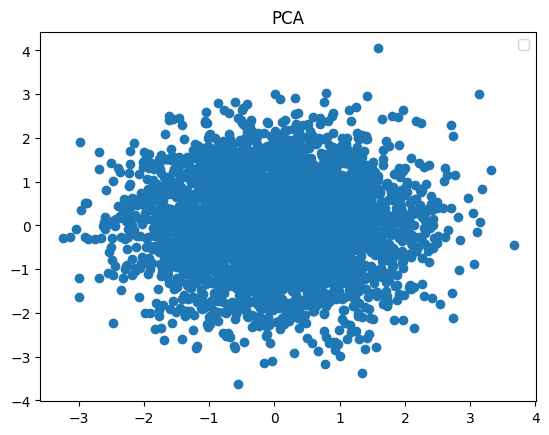

In [20]:
plt.scatter(X_std[: , 0] ,X_std[: , 1])
plt.legend()
plt.title('PCA')
plt.show()


This shows that the data structure is very dense

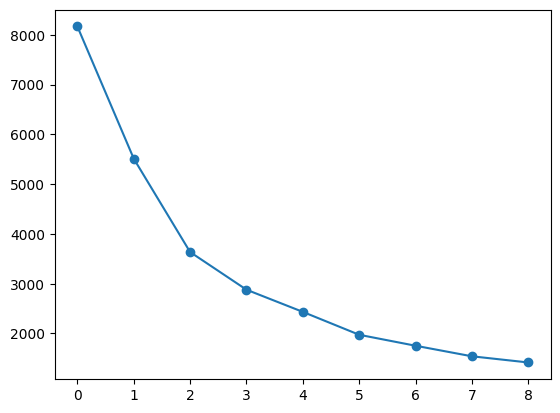

In [21]:
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(X_std)            
  wcss_1.append(kmeans.inertia_) 

grafico = px.line(x = range(1,10), y = wcss_1)
plt.plot(wcss_1, '-o',)  
grafico.show()

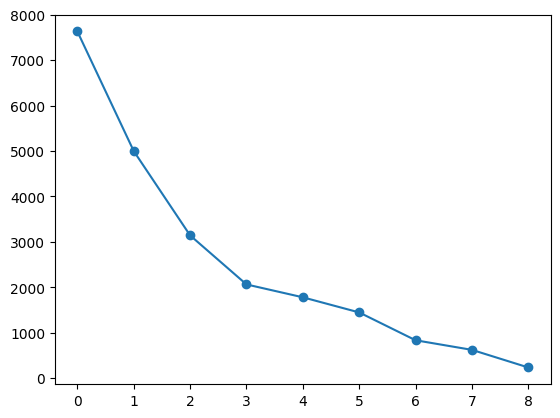

In [22]:
wcss_2 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(X_mm)            
  wcss_2.append(kmeans.inertia_) 

grafico = px.line(x = range(1,10), y = wcss_2)
plt.plot(wcss_2, '-o',)  
grafico.show()

* Elbow method shows clusters = 3
* Below, author compares kmeans and kmeans++ approaches in K Means, and comparing the results from StandardScaler and MinMaxScaler

In [23]:
k = 3

# Compute KMeans
kmeans_std = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=50).fit(X_std)

# Compute KMeans++
kmeans_plus_std = KMeans(n_clusters = k, n_init=1, init = 'k-means++', max_iter=50).fit(X_std)

# Compute KMeans
kmeans_mm = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=50).fit(X_mm)

# Compute KMeans++
kmeans_plus_mm = KMeans(n_clusters = k, n_init=1, init = 'k-means++', max_iter=50).fit(X_mm)

In [24]:
labels_kmeans_std = kmeans_std.labels_
labels_kmeans_plus_std = kmeans_plus_std.labels_
labels_kmeans_mm = kmeans_mm.labels_
labels_kmeans_plus_mm = kmeans_plus_mm.labels_

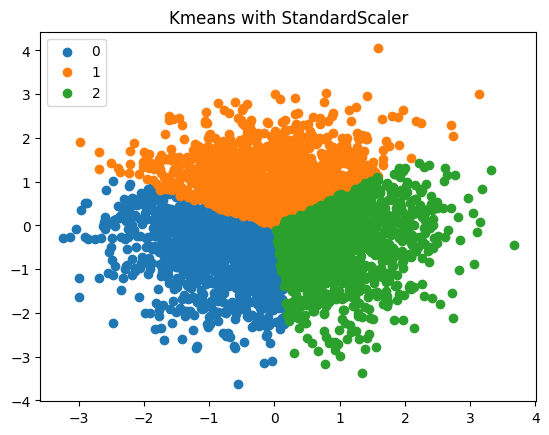

Inertia k-Means with StandardScaler: 3624.166374629897
Silhouette_score k-Means with StandardScaler : 0.3412686008588303
Davies_bouldin_score k-Means with StandardScaler : 0.9193132581987422


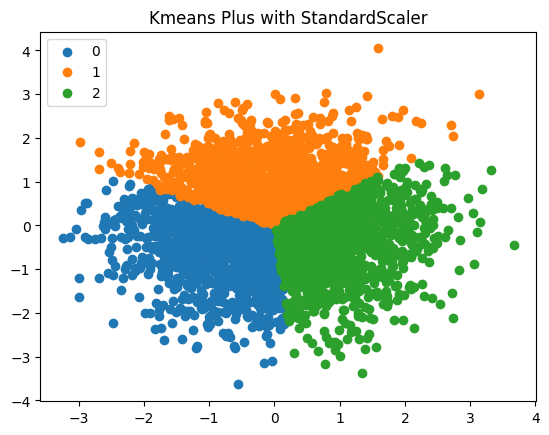

Inertia k-Means++ with StandardScaler: 3734.0658687788214
Silhouette_score k-Means++ with StandardScaler: 0.32758109721759765
Davies_bouldin_score k-Means++ with StandardScaler : 0.9451617650646198


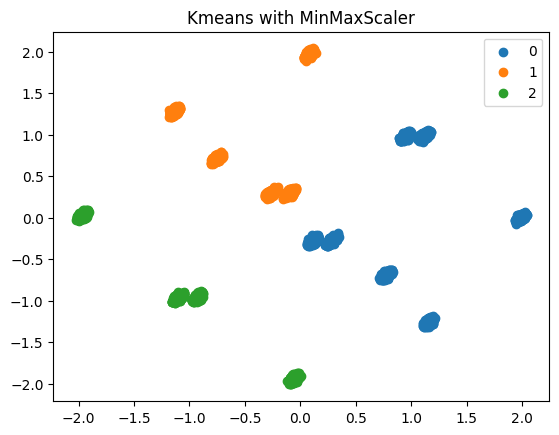

Inertia k-Means with MinMaxScaler: 3154.7480490000016
Silhouette_score k-Means with MinMaxScaler : 0.42698936612023036
Davies_bouldin_score k-Means with MinMaxScaler : 0.9164776796550161


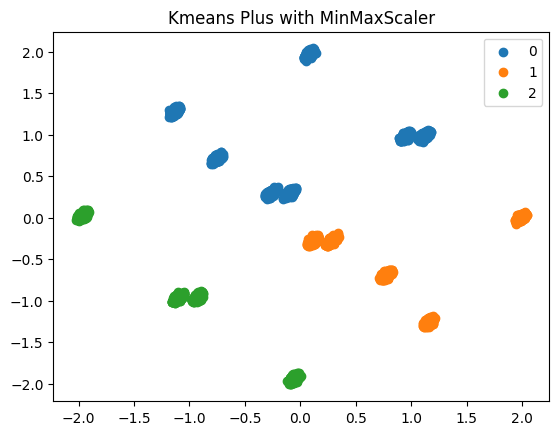

Inertia k-Means++ with MinMaxScaler: 3133.015348561998
Silhouette_score k-Means++ with MinMaxScaler: 0.43120925467042587
Davies_bouldin_score k-Means with MinMaxScaler : 0.9164776796550161


In [25]:
u_labels = np.unique(labels_kmeans_std)

for i in u_labels:
    xy = X_std[labels_kmeans_plus_std == i]
    plt.scatter(xy[: , 0] ,xy[: , 1] , label = i)
plt.legend()
plt.title('Kmeans with StandardScaler')
plt.show()

print("Inertia k-Means with StandardScaler:", kmeans_std.inertia_)
print("Silhouette_score k-Means with StandardScaler :",silhouette_score(X_std, labels_kmeans_std))
print("Davies_bouldin_score k-Means with StandardScaler :",davies_bouldin_score(X_std, labels_kmeans_std))

u_labels = np.unique(labels_kmeans_plus_std)

for i in u_labels:
    xy = X_std[labels_kmeans_plus_std == i]
    plt.scatter(xy[: , 0] ,xy[: , 1] , label = i)
plt.legend()
plt.title('Kmeans Plus with StandardScaler')
plt.show()

print("Inertia k-Means++ with StandardScaler:", kmeans_plus_std.inertia_)
print("Silhouette_score k-Means++ with StandardScaler:",silhouette_score(X_std, labels_kmeans_plus_std))
print("Davies_bouldin_score k-Means++ with StandardScaler :",davies_bouldin_score(X_std, labels_kmeans_plus_std))

u_labels = np.unique(labels_kmeans_mm)

for i in u_labels:
    plt.scatter(X_mm[labels_kmeans_mm == i , 0] , X_mm[labels_kmeans_mm == i , 1] , label = i)
plt.legend()
plt.title('Kmeans with MinMaxScaler')
plt.show()

print("Inertia k-Means with MinMaxScaler:", kmeans_mm.inertia_)
print("Silhouette_score k-Means with MinMaxScaler :",silhouette_score(X_mm, labels_kmeans_mm))
print("Davies_bouldin_score k-Means with MinMaxScaler :",davies_bouldin_score(X_mm, labels_kmeans_plus_mm))

u_labels = np.unique(labels_kmeans_plus_mm)

for i in u_labels:
    plt.scatter(X_mm[labels_kmeans_plus_mm == i , 0] , X_mm[labels_kmeans_plus_mm == i , 1] , label = i)
plt.legend()
plt.title('Kmeans Plus with MinMaxScaler')
plt.show()

print("Inertia k-Means++ with MinMaxScaler:", kmeans_plus_mm.inertia_)
print("Silhouette_score k-Means++ with MinMaxScaler:",silhouette_score(X_mm, labels_kmeans_plus_mm))
print("Davies_bouldin_score k-Means with MinMaxScaler :",davies_bouldin_score(X_mm, labels_kmeans_plus_mm))

# Conclusion 1
* K Means and KMeans++ with StandardScaler data resulted in clearly segmented data, but the silhouette score and Davies-Bouldin do not show significant performance
* This data is very dense, next experiment shows that the data points are overlapping with each other, thus a hierarchical clustering would work better

# Optimizing K Means

* Trial to see the effect of optimized PCA
* I tried using standardscaler data only

**df_cleaning2's dimensionality are manually reduced based on assumption that gender, smoking_status, bmi, and skin_thickness do not affect the decision for treatment**

In [26]:
df_cleaning2 = df_cleaning.copy()

In [27]:
df_cleaning2 = df_cleaning2.drop(['gender'], axis=1)
df_cleaning2 = df_cleaning2.drop(['smoking_status'], axis=1)
df_cleaning2 = df_cleaning2.drop(['bmi'], axis=1)
df_cleaning2 = df_cleaning2.drop(['skin_thickness'], axis=1)

**df_std2 is df_cleaning2 with StandardScaler**

In [28]:
df_std2 = df_cleaning2.copy()
cat_columns = ['age', 'chest_pain_type', 'hypertension', 'heart_disease']

std_scaler = StandardScaler()
le = LabelEncoder()

for col in cat_columns:
    df_std2[col] = le.fit_transform(df_std2[col])

df_std2 = std_scaler.fit_transform(df_std2)
df_std2

array([[-1.41054508,  1.32838557,  2.43864014, ..., -1.18010782,
         1.01402442,  0.98722672],
       [-0.36638608,  0.43465733,  2.88072947, ...,  1.69715177,
         1.01402442, -1.01293854],
       [-0.22400076,  0.43465733, -0.90860762, ..., -1.09727374,
         1.01402442,  0.98722672],
       ...,
       [-0.12907721, -0.45907091,  0.81764594, ..., -0.02974242,
        -0.98616955,  0.98722672],
       [ 0.77269647, -0.45907091, -0.29810331, ..., -0.94070899,
        -0.98616955,  0.98722672],
       [ 1.15239066, -0.45907091, -0.06653271, ..., -0.83516275,
         1.01402442, -1.01293854]])

Testing on Manually Reduced Dimensions, based on assumption: heart_disease, hypertension, diabetes_pedigree, insulin, max_heart_rate, blood_pressure, age, chest_pain_type as the main decision maker

In [29]:
pca2 = PCA()
X_std2 = pca2.fit_transform(df_std2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


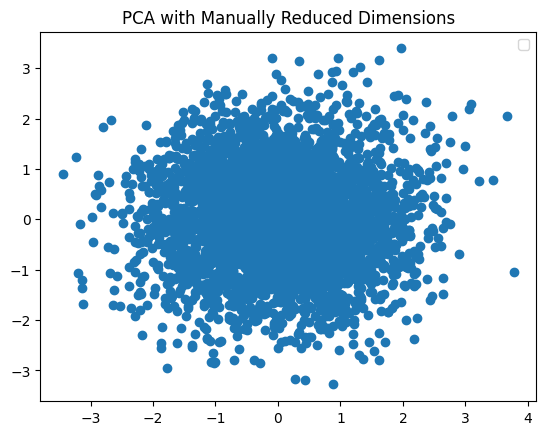

In [30]:
plt.scatter(X_std2[: , 0] ,X_std2[: , 1])
plt.legend()
plt.title('PCA with Manually Reduced Dimensions')
plt.show()

Dataset is now less dense after minimizing the dimensions

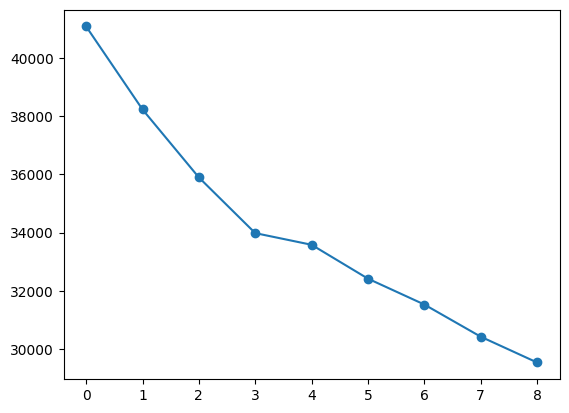

In [31]:
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(X_std2)            
  wcss_1.append(kmeans.inertia_) 

grafico = px.line(x = range(1,10), y = wcss_1)
plt.plot(wcss_1, '-o',)  
grafico.show()

Elbow shows 3

In [32]:
k = 3

# Compute KMeans
kmeans_std2 = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=50).fit(X_std2)

# Compute KMeans++
kmeans_plus_std2 = KMeans(n_clusters = k, n_init=1, init = 'k-means++', max_iter=50).fit(X_std2)

In [33]:
labels_kmeans_std2 = kmeans_std2.labels_
labels_kmeans_plus_std2 = kmeans_plus_std2.labels_

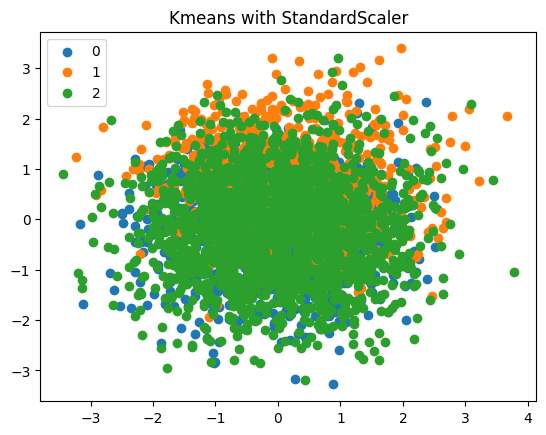

Inertia k-Means with StandardScaler: 36063.2003374748
Silhouette_score k-Means with StandardScaler : 0.06910978479804546
Davies_bouldin_score k-Means with StandardScaler : 3.1305952320794446


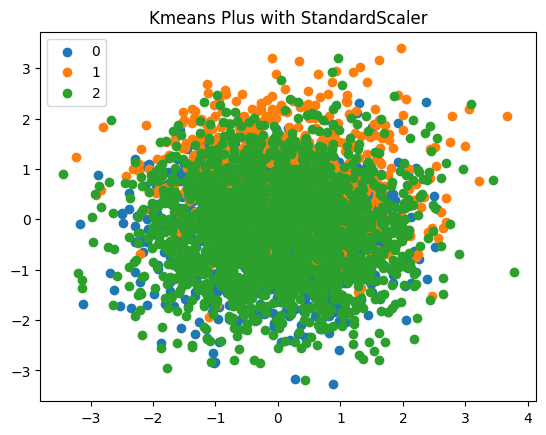

Inertia k-Means++ with StandardScaler: 35476.527106893154
Silhouette_score k-Means++ with StandardScaler: 0.0764838410328443
Davies_bouldin_score k-Means++ with StandardScaler : 2.875898416031928


In [34]:
u_labels = np.unique(labels_kmeans_std2)

for i in u_labels:
    xy = X_std2[labels_kmeans_plus_std2 == i]
    plt.scatter(xy[: , 0] ,xy[: , 1] , label = i)
plt.legend()
plt.title('Kmeans with StandardScaler')
plt.show()

print("Inertia k-Means with StandardScaler:", kmeans_std2.inertia_)
print("Silhouette_score k-Means with StandardScaler :",silhouette_score(X_std2, labels_kmeans_std2))
print("Davies_bouldin_score k-Means with StandardScaler :",davies_bouldin_score(X_std2, labels_kmeans_std2))

u_labels = np.unique(labels_kmeans_plus_std2)

for i in u_labels:
    xy = X_std2[labels_kmeans_plus_std2 == i]
    plt.scatter(xy[: , 0] ,xy[: , 1] , label = i)
plt.legend()
plt.title('Kmeans Plus with StandardScaler')
plt.show()

print("Inertia k-Means++ with StandardScaler:", kmeans_plus_std2.inertia_)
print("Silhouette_score k-Means++ with StandardScaler:",silhouette_score(X_std2, labels_kmeans_plus_std2))
print("Davies_bouldin_score k-Means++ with StandardScaler :",davies_bouldin_score(X_std2, labels_kmeans_plus_std2))


Optimized PCA, getting the components that can represent 95% of the variance

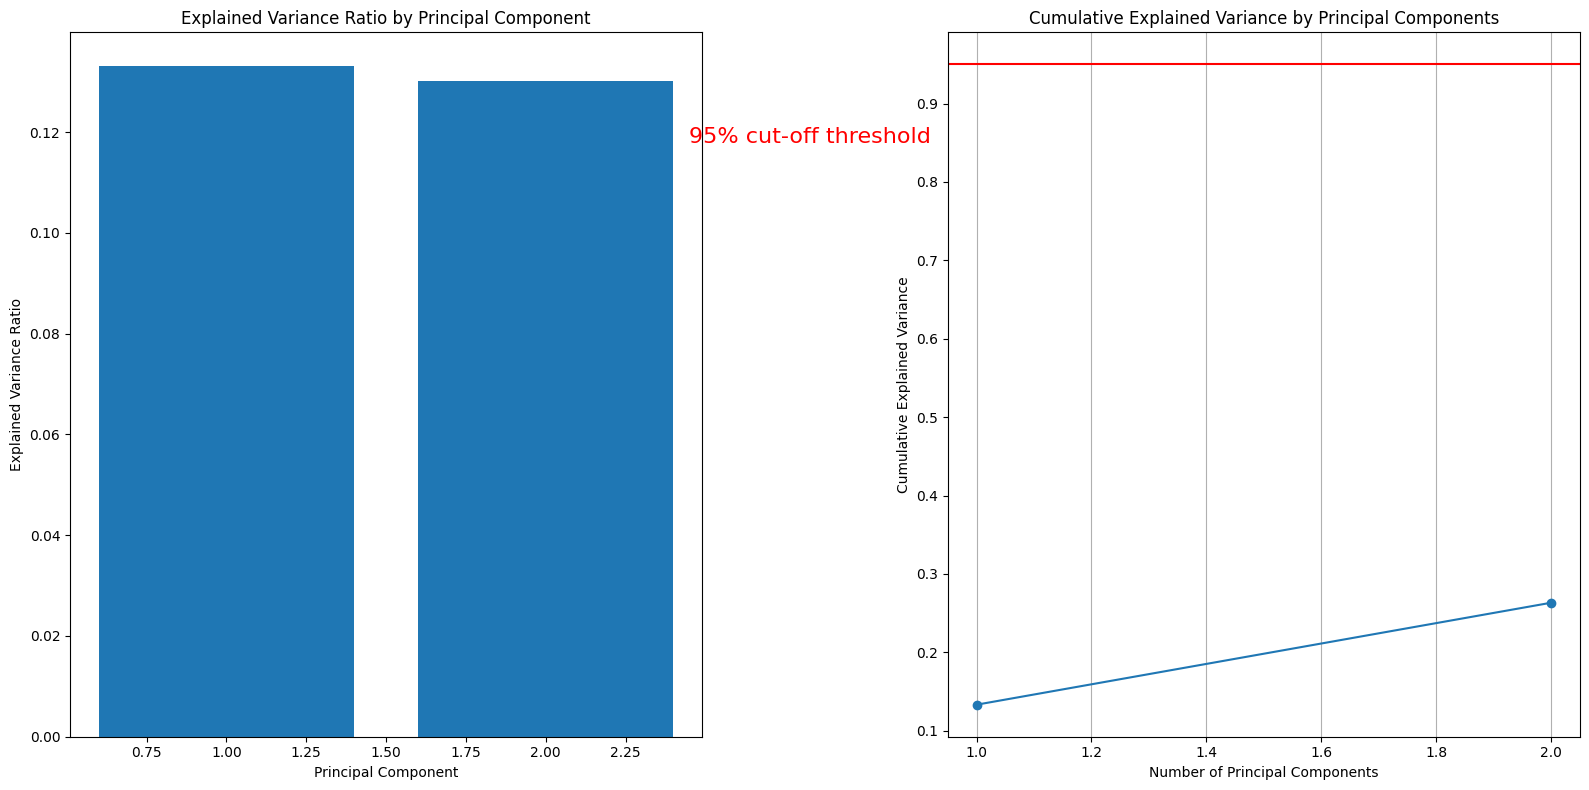

In [35]:
# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a 2x1 grid of subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Plot the explained variance ratio in the first subplot
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
ax1.set_xlabel("Principal Component")
ax1.set_ylabel("Explained Variance Ratio")
ax1.set_title("Explained Variance Ratio by Principal Component")

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance in the second subplot
ax2.plot(
    range(1, len(cumulative_explained_variance) + 1),
    cumulative_explained_variance,
    marker="o",
)
ax2.set_xlabel("Number of Principal Components")
ax2.set_ylabel("Cumulative Explained Variance")
ax2.set_title("Cumulative Explained Variance by Principal Components")
#95% variance threshold
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)
ax2.grid(axis='x')
# Display the figure
plt.tight_layout()
plt.show()

Based on above analysis, 13 is the best number of Principal Components. Below is the new PCA

In [36]:
pca3 = PCA(n_components = 13)
X_std3 = pca3.fit_transform(df_std)

In [37]:
X_std3

array([[ 2.65288125, -0.14152633,  0.43376998, ...,  1.46715591,
         0.64484485, -1.13446438],
       [ 1.6211516 ,  0.82532938, -0.04740289, ...,  1.18203262,
         2.20618053, -0.07577036],
       [ 1.18124931,  0.17204638,  0.78560501, ..., -0.52672014,
        -0.57163346, -0.64581025],
       ...,
       [-0.85746194,  0.44583999, -1.51584566, ..., -2.19378693,
         0.93981068, -0.84145425],
       [-1.31550306, -0.74701838, -0.42055086, ..., -0.73884044,
        -0.42323435, -2.11193319],
       [ 0.66042829,  0.50415478, -0.02822307, ..., -0.09800514,
        -0.52445391,  0.5631076 ]])

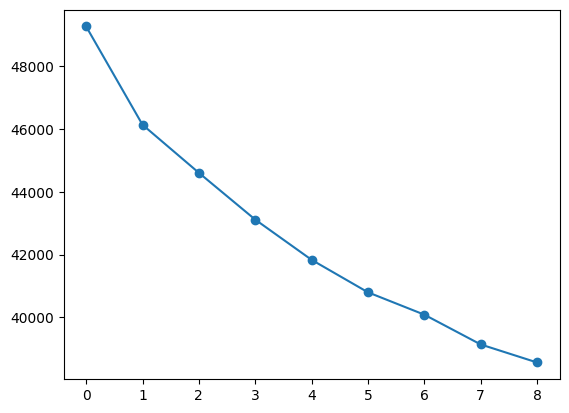

In [38]:
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(X_std3)            
  wcss_1.append(kmeans.inertia_) 

grafico = px.line(x = range(1,10), y = wcss_1)
plt.plot(wcss_1, '-o',)  
grafico.show()

In [39]:
k = 4

# Compute KMeans
kmeans_std3 = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=50).fit(X_std3)

# Compute KMeans++
kmeans_plus_std3 = KMeans(n_clusters = k, n_init=1, init = 'k-means++', max_iter=50).fit(X_std3)

In [40]:
labels_kmeans_std3 = kmeans_std3.labels_
labels_kmeans_plus_std3 = kmeans_plus_std3.labels_

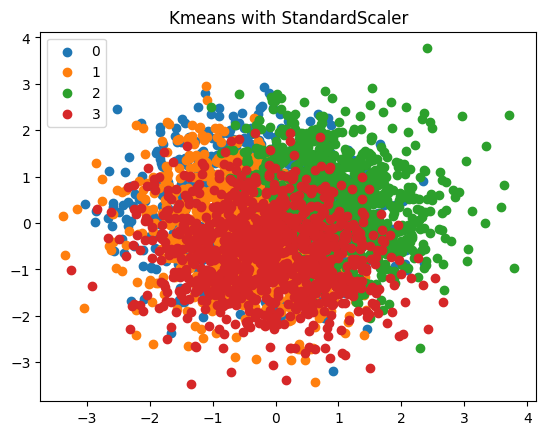

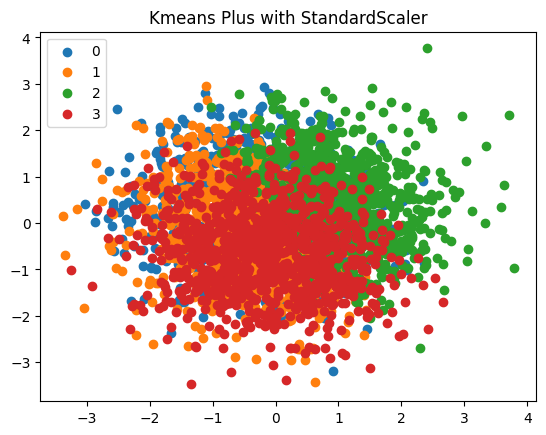

Inertia k-Means with StandardScaler: 43053.58022992239
Inertia k-Means++ with StandardScaler: 42927.38095650099
Silhouette_score k-Means with StandardScaler : 0.052261320174707054
Davies_bouldin_score k-Means with StandardScaler : 3.372279144590702
Silhouette_score k-Means++ with StandardScaler: 0.054957250745127084
Davies_bouldin_score k-Means++ with StandardScaler : 3.5540692366879307


In [41]:
u_labels = np.unique(labels_kmeans_std3)

for i in u_labels:
    xy = X_std3[labels_kmeans_plus_std3 == i]
    plt.scatter(xy[: , 0] ,xy[: , 1] , label = i)
plt.legend()
plt.title('Kmeans with StandardScaler')
plt.show()

u_labels = np.unique(labels_kmeans_plus_std3)

for i in u_labels:
    xy = X_std3[labels_kmeans_plus_std3 == i]
    plt.scatter(xy[: , 0] ,xy[: , 1] , label = i)
plt.legend()
plt.title('Kmeans Plus with StandardScaler')
plt.show()

print("Inertia k-Means with StandardScaler:", kmeans_std3.inertia_)
print("Inertia k-Means++ with StandardScaler:", kmeans_plus_std3.inertia_)
print("Silhouette_score k-Means with StandardScaler :",silhouette_score(X_std3, labels_kmeans_std3))
print("Davies_bouldin_score k-Means with StandardScaler :",davies_bouldin_score(X_std3, labels_kmeans_std3))
print("Silhouette_score k-Means++ with StandardScaler:",silhouette_score(X_std3, labels_kmeans_plus_std3))
print("Davies_bouldin_score k-Means++ with StandardScaler :",davies_bouldin_score(X_std3, labels_kmeans_plus_std3))

# Hierarchical Approach

In [56]:
agglo_single_std = AgglomerativeClustering(linkage='single',n_clusters=3).fit(X_std)
cluster_labels = agglo_single_std.labels_

agglo_avg_std = AgglomerativeClustering(linkage='average',n_clusters=3).fit(X_std)
agglo_single_mm = AgglomerativeClustering(linkage='single',n_clusters=3).fit(X_mm)
agglo_avg_mm = AgglomerativeClustering(linkage='average',n_clusters=3).fit(X_mm)

labels_agglo_std = agglo_single_std.labels_
labels_agglo_avg_std = agglo_avg_std.labels_
labels_agglo_mm = agglo_single_mm.labels_
labels_agglo_avg_mm = agglo_avg_mm.labels_

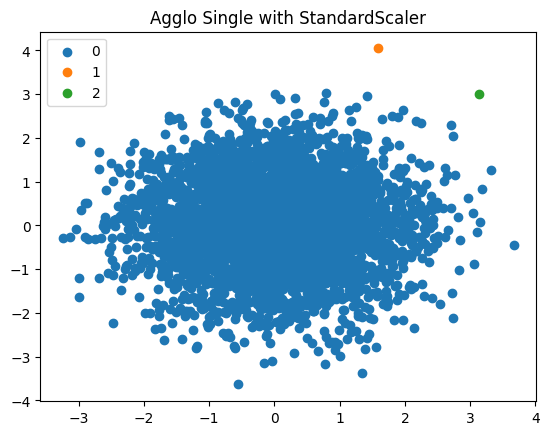

Silhouette_score Agglo Single with StandardScaler : 0.5348418423103273
Davies_bouldin_score Agglo Single with StandardScaler : 0.30375938123772733


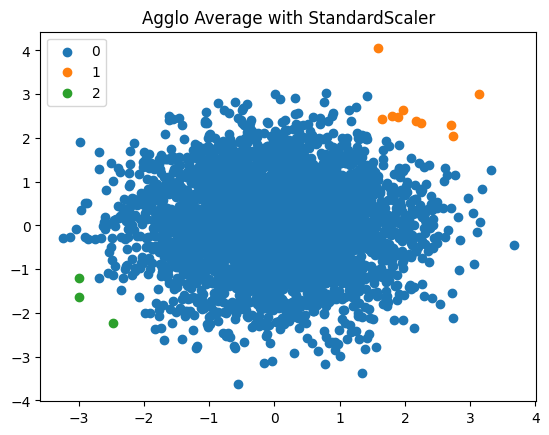

Silhouette_score Agglo Average with StandardScaler: 0.3009476831639963
Davies_bouldin_score Agglo Average with StandardScaler : 0.5522531549351736


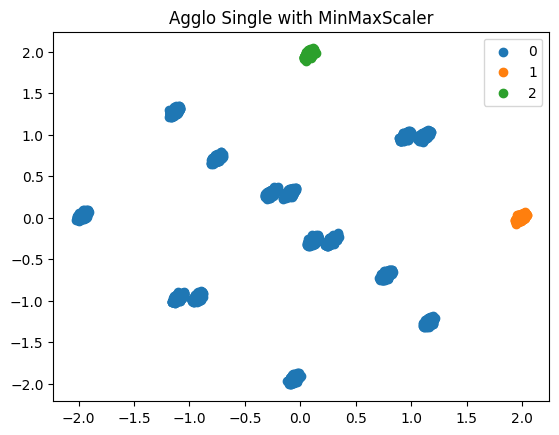

Silhouette_score Agglo Single with MinMaxScaler : 0.22568612916974992
Davies_bouldin_score Agglo Single with MinMaxScaler : 0.5717983600484352


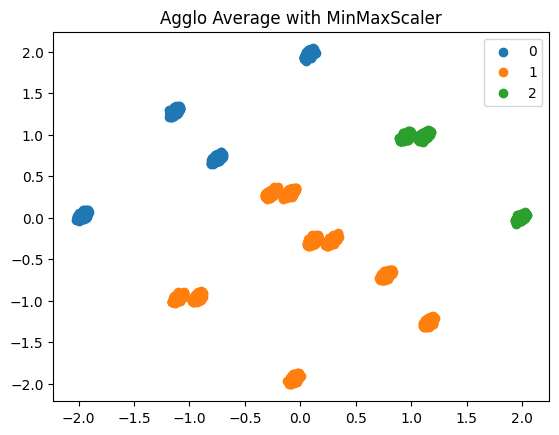

Silhouette_score Agglo Average with MinMaxScaler: 0.4237818235958455
Davies_bouldin_score Agglo Average with MinMaxScaler : 0.9133505095129171


In [43]:
a_labels = np.unique(labels_agglo_std)

for i in a_labels:
    plt.scatter(X_std[labels_agglo_std == i , 0] , X_std[labels_agglo_std == i , 1] , label = i)
plt.legend()
plt.title('Agglo Single with StandardScaler')
plt.show()

print("Silhouette_score Agglo Single with StandardScaler :",silhouette_score(X_std, labels_agglo_std))
print("Davies_bouldin_score Agglo Single with StandardScaler :",davies_bouldin_score(X_std, labels_agglo_std))

a_labels = np.unique(labels_agglo_avg_std)

for i in a_labels:
    plt.scatter(X_std[labels_agglo_avg_std == i , 0] , X_std[labels_agglo_avg_std == i , 1] , label = i)
plt.legend()
plt.title('Agglo Average with StandardScaler')
plt.show()

print("Silhouette_score Agglo Average with StandardScaler:",silhouette_score(X_std, labels_agglo_avg_std))
print("Davies_bouldin_score Agglo Average with StandardScaler :",davies_bouldin_score(X_std, labels_agglo_avg_std))

a_labels = np.unique(labels_agglo_mm)

for i in a_labels:
    plt.scatter(X_mm[labels_agglo_mm == i , 0] , X_mm[labels_agglo_mm == i , 1] , label = i)
plt.legend()
plt.title('Agglo Single with MinMaxScaler')
plt.show()

print("Silhouette_score Agglo Single with MinMaxScaler :",silhouette_score(X_mm, labels_agglo_mm))
print("Davies_bouldin_score Agglo Single with MinMaxScaler :",davies_bouldin_score(X_mm, labels_agglo_mm))

a_labels = np.unique(labels_agglo_avg_mm)

for i in a_labels:
    plt.scatter(X_mm[labels_agglo_avg_mm == i , 0] , X_mm[labels_agglo_avg_mm == i , 1] , label = i)
plt.legend()
plt.title('Agglo Average with MinMaxScaler')
plt.show()

print("Silhouette_score Agglo Average with MinMaxScaler:",silhouette_score(X_mm, labels_agglo_avg_mm))
print("Davies_bouldin_score Agglo Average with MinMaxScaler :",davies_bouldin_score(X_mm, labels_agglo_avg_mm))

In [44]:
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import normalize

data_scaled = normalize(df_cleaning)
data_scaled = pd.DataFrame(data_scaled, columns = df_cleaning.columns)
data_scaled.head()

,age,gender,chest_pain_type,blood_pressure,cholesterol,max_heart_rate,exercise_angina,plasma_glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,smoking_status
0,0.061269,0.002553,0.010212,0.638222,0.354852,0.541212,0.0,0.275712,0.084245,0.278265,0.097008,0.001226,0.002553,0.002553,0.002553
1,0.107549,0.000000,0.007014,0.633605,0.432535,0.451239,0.0,0.348366,0.100535,0.238479,0.088593,0.005780,0.002338,0.000000,0.000000
2,0.135695,0.002769,0.008308,0.252005,0.451393,0.531702,0.0,0.448624,0.085848,0.470778,0.035358,0.001489,0.002769,0.002769,0.002769
3,0.246215,0.003908,0.011725,0.070347,0.601858,0.418174,0.0,0.402541,0.261847,0.398633,0.087441,0.004152,0.000000,0.000000,0.000000
4,0.078872,0.002132,0.008527,0.560633,0.428468,0.428468,0.0,0.396493,0.044765,0.383703,0.076023,0.000322,0.000000,0.000000,0.002132


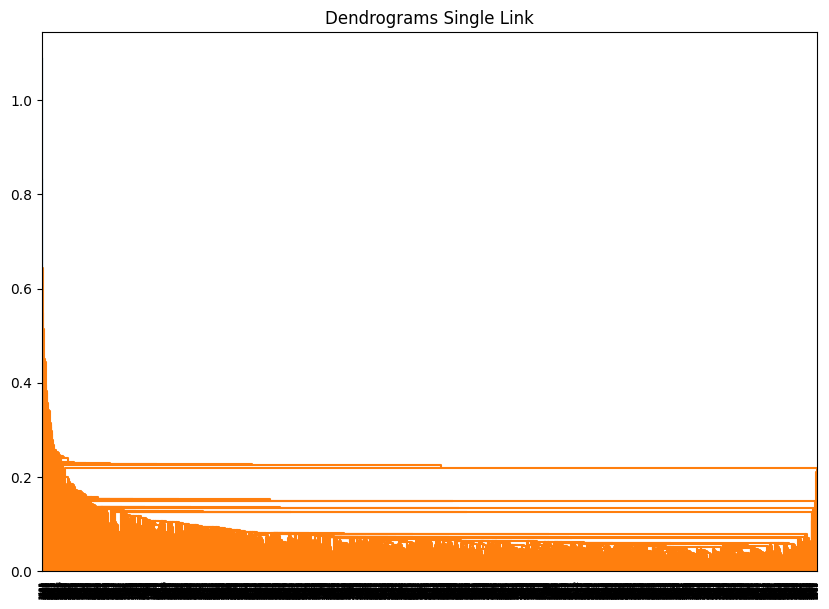

In [45]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms Single Link")  
dend = shc.dendrogram(shc.linkage(X_std, method='single'))

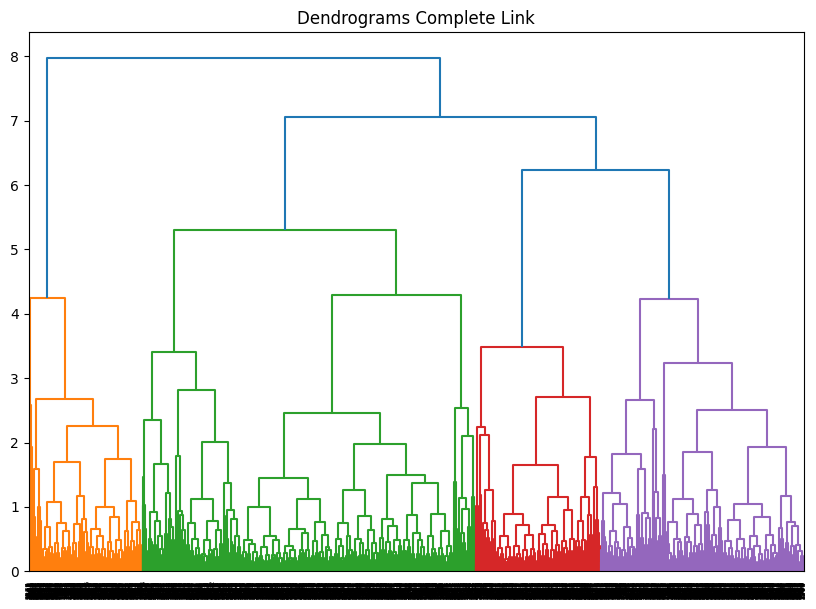

In [46]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms Complete Link")  
dend = shc.dendrogram(shc.linkage(X_std, method='complete'))

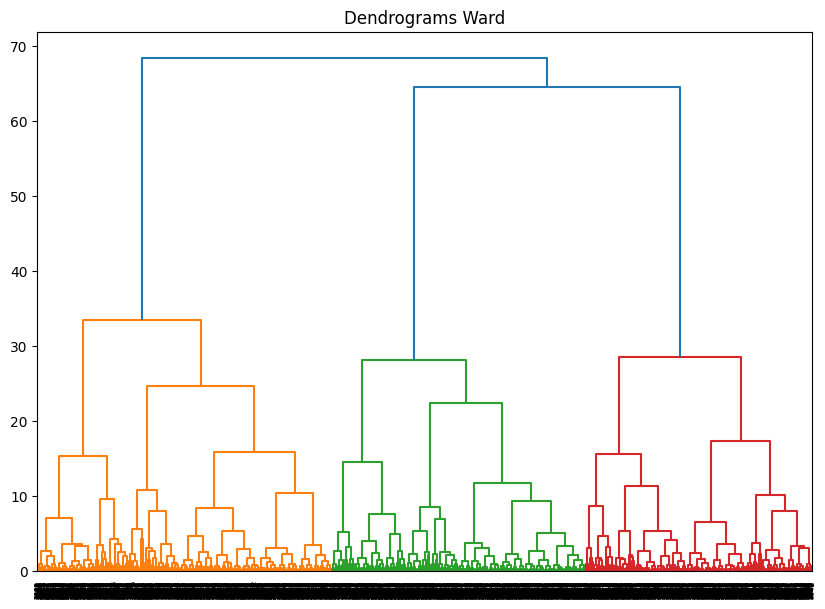

In [54]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms Ward")  
dend = shc.dendrogram(shc.linkage(X_std, method='ward'))

MinMaxScaler Data with Hierarchical Clustering

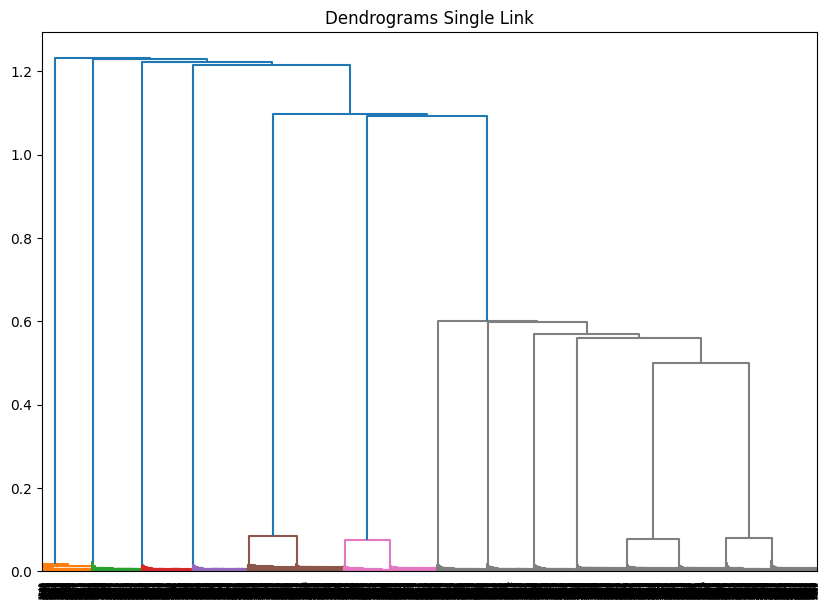

In [48]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms Single Link")  
dend = shc.dendrogram(shc.linkage(X_mm, method='single'))

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

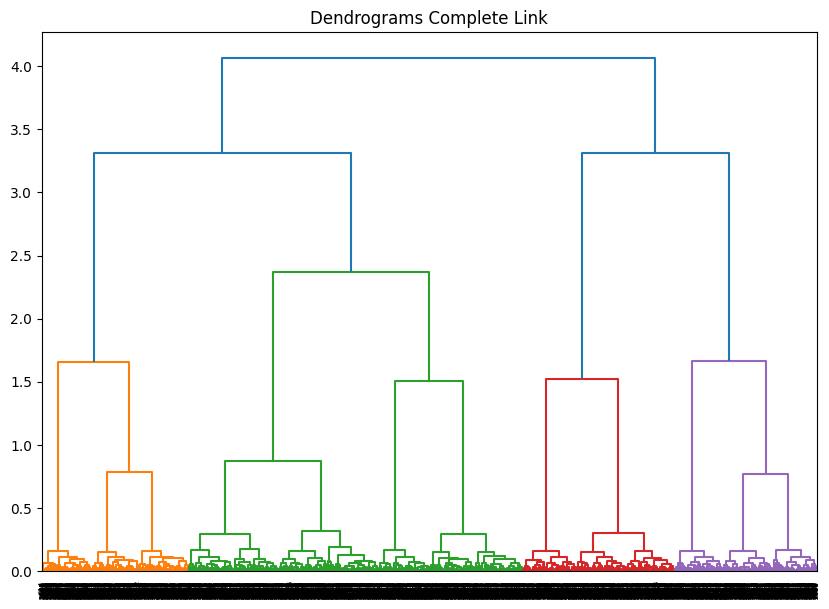

In [52]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms Complete Link")  
dend = shc.dendrogram(shc.linkage(X_mm, method='complete'))


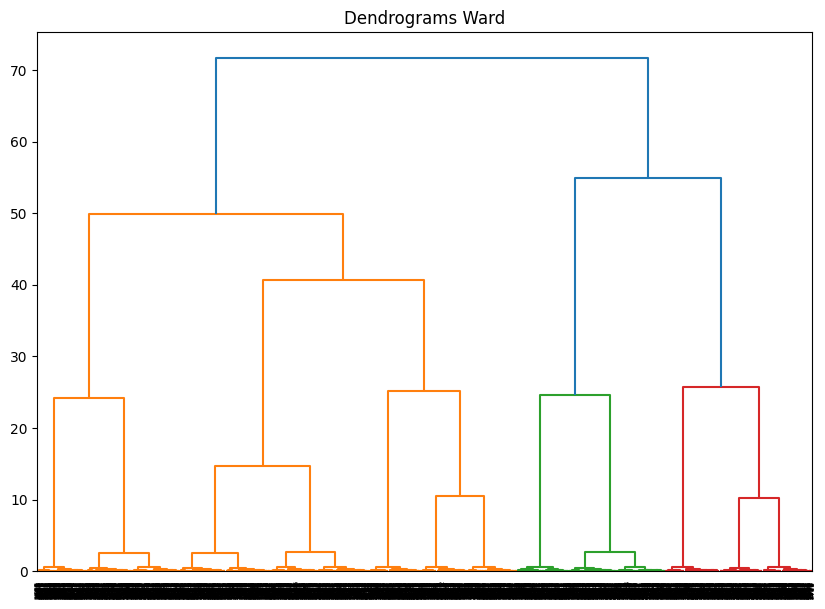

In [50]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms Ward")  
dend = shc.dendrogram(shc.linkage(X_mm, method='ward'))

# Conclusion 2
Hierarchical clustering (based on dendogram) shows better results in segmentation, compared to K Means. Based on references, K Means have weaknesses in handling dense dataset